In [ ]:
# 📈 AI-Driven Regime-Aware Stock Analysis & Forecasting System

**Module E – AI Applications (Individual Open Project)**  

This notebook serves as the **primary evaluation artifact** and documents the
design, implementation, and evaluation of an intelligent decision-support
system for analyzing Indian equity stocks using Artificial Intelligence.


In [ ]:
## 1. Problem Definition & Objective

Retail investors often rely on isolated indicators such as price charts,
valuation ratios, or short-term trends. These fragmented approaches fail to:

- Account for changing market regimes  
- Quantify uncertainty and downside risk  
- Provide interpretable, confidence-aware decisions  

### Objective
To design an AI-based stock analysis system that integrates:
- Fundamental strength
- Market regime awareness
- Probabilistic price forecasting
- Risk-aware decision interpretation

The goal is **decision support**, not price prediction.


In [ ]:
## 2. Data Understanding & Preparation

### Data Sources
- **Yahoo Finance API**: historical prices and company fundamentals
- **Derived indicators**: returns, volatility, momentum
- **Simulated paths**: Monte Carlo price scenarios

### Preprocessing Steps
- Log-return transformation for stationarity
- Rolling volatility windows for regime features
- Feature scaling for probabilistic models
- Robust handling of missing or noisy values

All preprocessing steps are designed to ensure **financial realism** and
model stability.


In [3]:
import yfinance as yf
import pandas as pd

from scoring import calculate_stock_score
from forecast import IntelligentForecastEngine


✅ scoring.py - PENALTY COMPOUNDING FIXED
✅ ALL FUNCTIONS RESTORED
✅ FIX 1: All pillars now start at 12.0 (true neutral)
✅ FIX 2: Sector valuation adjustment is INFO ONLY (no score impact)
✅ FIX 3: Calibration offsets reduced by 70%
✅ FIX 4: Conglomerates = weight changes only (no penalties)
✅ FIX 5: Pillar clamping relaxed (5-19 range)
✅ FIX 6: Score scale expanded for good stocks (>50 × 1.25)
✅ Expected results: Good stocks 65-85, not 40-55
✅ Conglomerate detection enhanced with UniversalConglomerateDetector


In [5]:
symbol = "TCS.NS"

df = yf.download(symbol, start="2020-01-01", progress=False)


if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df.dropna()

df.head()

df.columns



Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

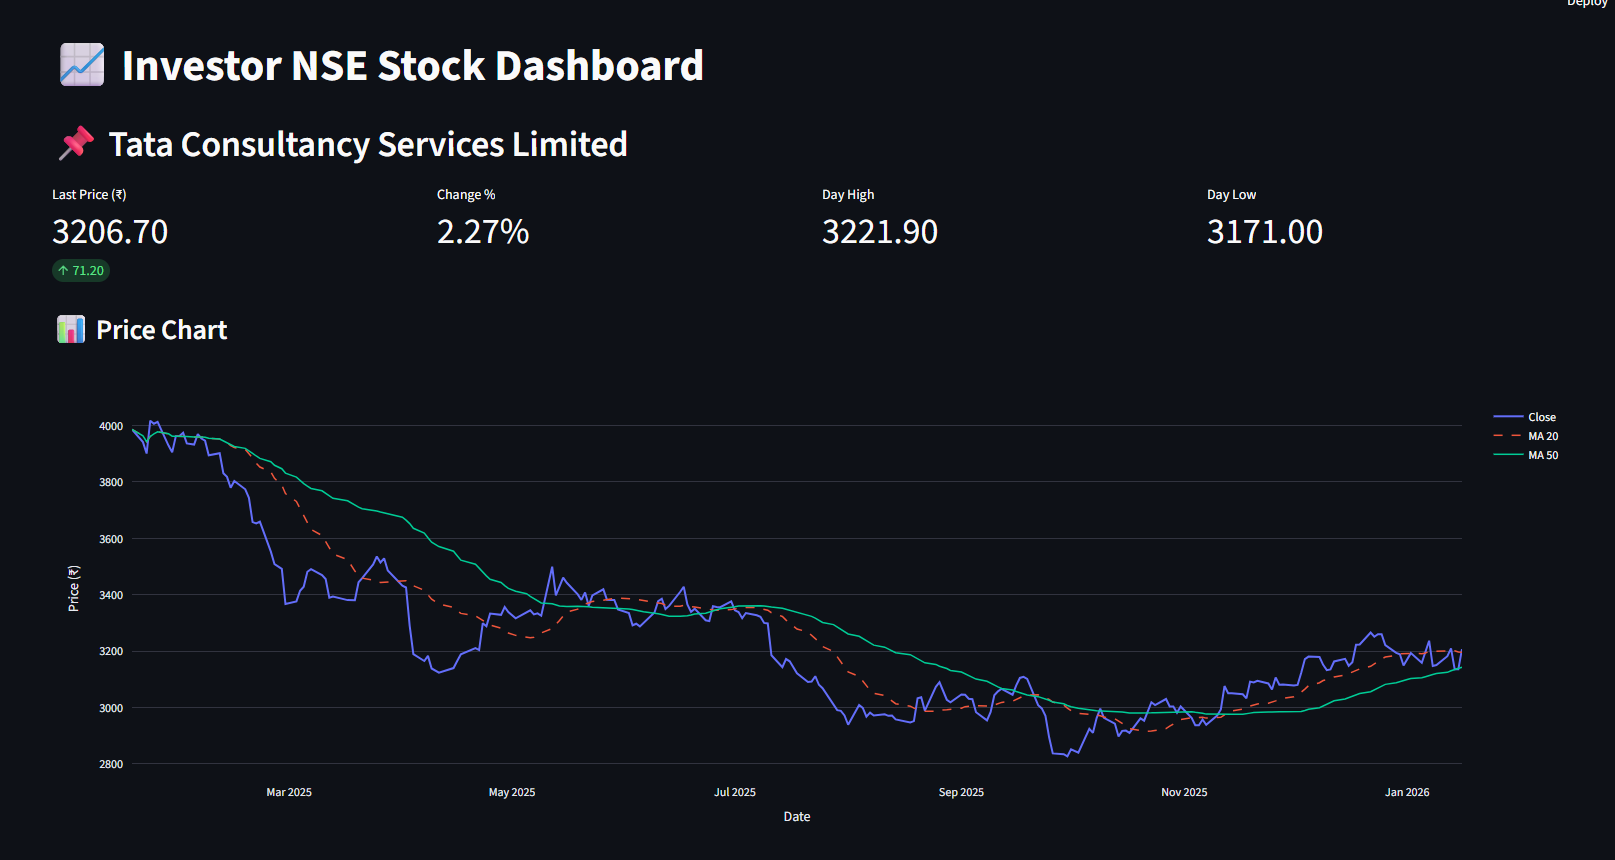

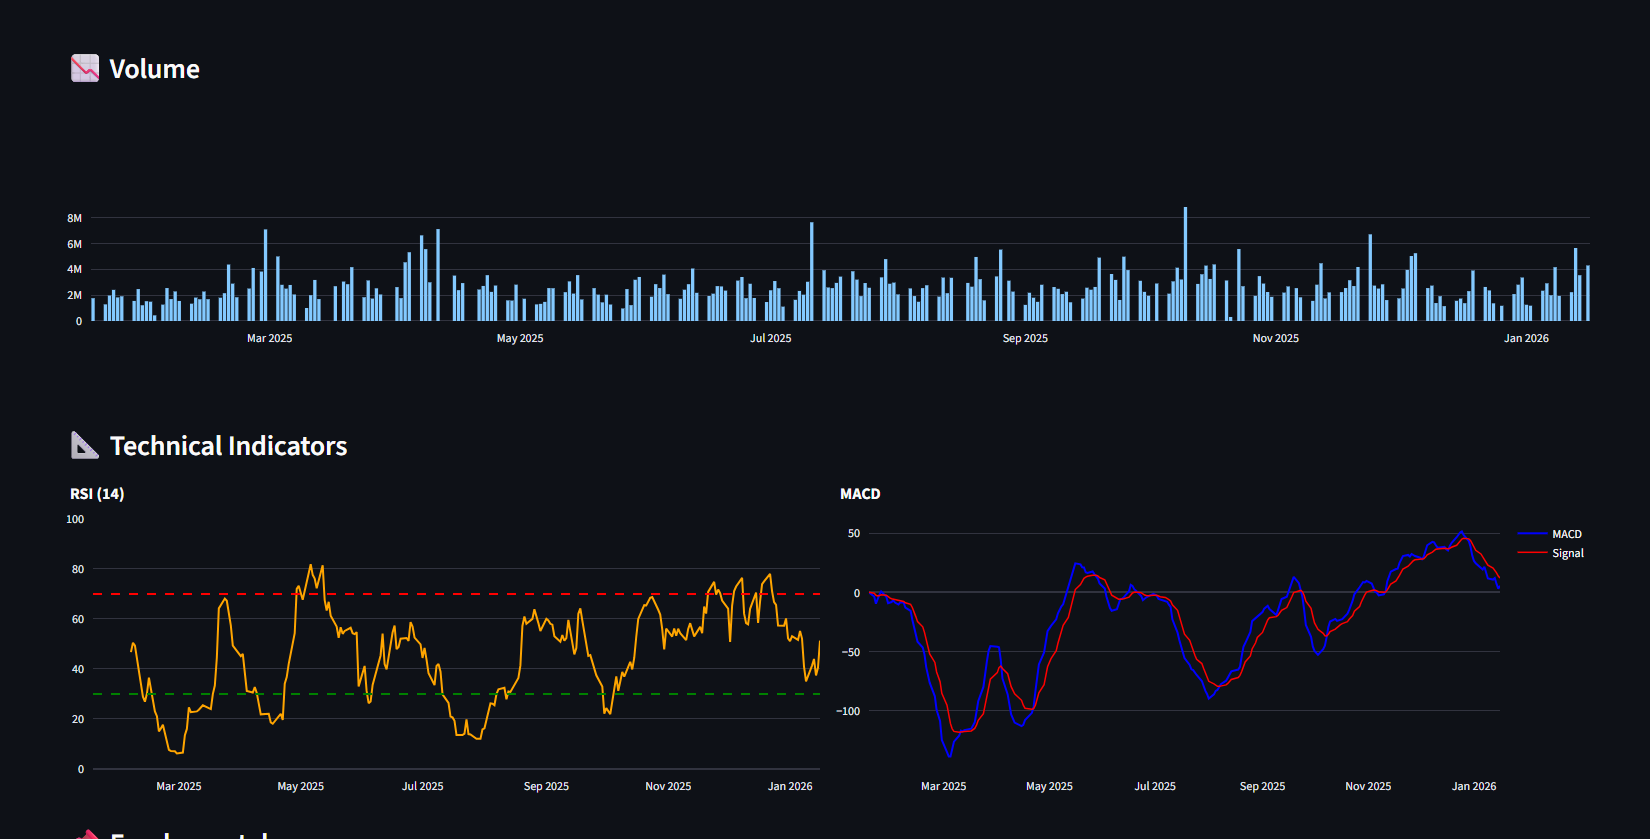

In [52]:
from IPython.display import Image, display

display(Image(filename="dashboard.png"))
display(Image(filename="dashboard1.png"))

In [7]:
import yfinance as yf

ticker = yf.Ticker(symbol)
info = ticker.info


type(info), info.get("shortName", "N/A")


(dict, 'TATA CONSULTANCY SERV LT')

In [40]:
scoring_result = calculate_stock_score(info, df)


🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x

🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x

🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x

🔍 DEBT PATCH analyzing: TATA CONSULTANCY SERV LT (TCS.NS)
⚠️ Yahoo (Forced (IT sector correction)): D/E = 0.100x
📊 Debt Ratio: Using Yahoo Forced (IT sector correction) → 0.100x


In [9]:
scoring_result

{'total_score': 69.2,
 'pillars': {'Valuation': {'score': 12.6,
   'reasons': ['P/E Ratio: P/E (24.3x) is reasonable',
    'Price to Book: P/B (10.2x) is high',
    'PB 10.2x vs sector 5x (expensive)'],
   'metrics': [{'name': 'P/E Ratio',
     'value': 24.330044,
     'formatted': '24.3x',
     'score_impact': 0.2499,
     'reason': 'P/E (24.3x) is reasonable'},
    {'name': 'Price to Book',
     'value': 10.221307,
     'formatted': '10.2x',
     'score_impact': -0.1666,
     'reason': 'P/B (10.2x) is high'}],
   'original_score': 12.5833,
   'calibration_adjustment': 0},
  'Profitability': {'score': 13.7,
   'reasons': ['ROE: ROE (42.6%) is excellent',
    'Operating Margin: Operating margin (25.2%) is strong'],
   'metrics': [{'name': 'ROE',
     'value': 0.42635,
     'formatted': '42.6%',
     'score_impact': 0.6664,
     'reason': 'ROE (42.6%) is excellent'},
    {'name': 'Operating Margin',
     'value': 0.25179002,
     'formatted': '25.2%',
     'score_impact': 0.4998,
     '

In [10]:
{
    "Total Score": scoring_result["formatted_values"]["total_score"],
    "Regime Adjusted Score": scoring_result["formatted_values"]["regime_adjusted_score"],
    "Recommendation": scoring_result["recommendation"][0],
    "Confidence Level": scoring_result["confidence_level"],
    "Market Regime": scoring_result["market_regime"],
    "Upside Probability": scoring_result["formatted_values"]["upside_probability"]
}


{'Total Score': '69.2/100',
 'Regime Adjusted Score': '73.2/100',
 'Recommendation': 'Accumulate',
 'Confidence Level': 'Medium',
 'Market Regime': 'Mild Bull',
 'Upside Probability': '60.0%'}

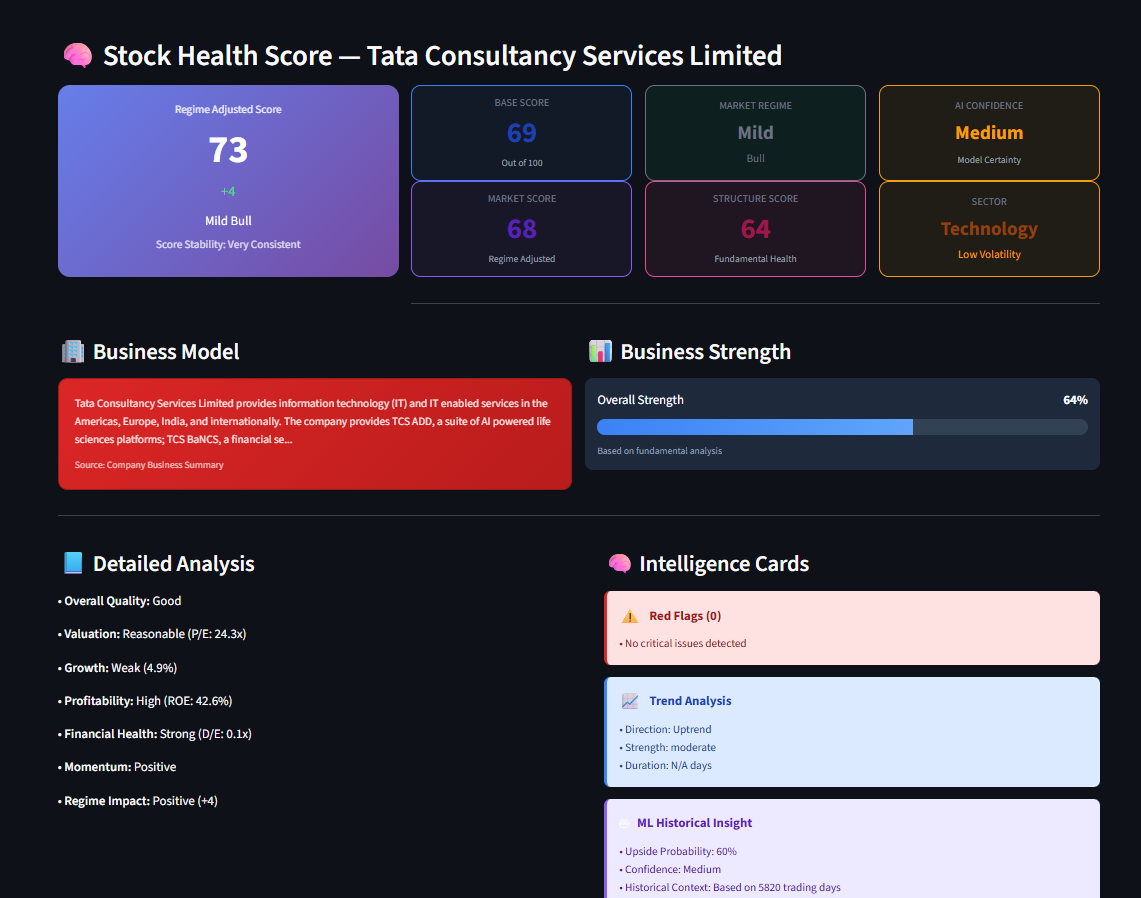

In [53]:
display(Image(filename="scoring.png"))

In [ ]:
## 4. Scoring Results Interpretation

The stock was evaluated across five core pillars:
valuation, profitability, growth, financial health, and momentum.

### Key Observations
- **Overall Score:** 69.2 / 100 → indicates good investment quality
- **Regime Adjusted Score:** 73.2 / 100 under a *Mild Bull* market regime
- **Recommendation:** *Accumulate* with medium confidence

### Strengths
- Excellent profitability with ROE above 40%
- Strong operating margins and balance sheet
- Very low debt levels and healthy liquidity

### Weaknesses
- Modest revenue growth
- Declining earnings in recent periods
- Elevated price-to-book valuation

Overall, the stock demonstrates strong fundamentals suitable for a
core portfolio, but requires careful timing due to growth-related concerns.


In [19]:
# Direct access to internal engine (bypassing ensemble completely)
engine = forecast_system.engine

In [ ]:
# ===============================
# SAFE Regime Analysis (HMM)
# ===============================

horizons = [20, 60, 120, 252]  # 1Y ≈ 252 trading days

regime_safe = engine.hmm.get_regime_timeline(
    engine.df,
    horizons=horizons
)

regime_safe

In [27]:
def round_nested(obj, decimals=2):
    """
    Recursively round all float values in a nested dict / list
    """
    if isinstance(obj, dict):
        return {k: round_nested(v, decimals) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [round_nested(v, decimals) for v in obj]
    elif isinstance(obj, float):
        return round(obj, decimals)
    else:
        return obj

In [28]:
regime_rounded = round_nested(regime_safe, decimals=2)
regime_rounded

{'current_regime': 'Bull',
 'current_confidence': 0.49,
 'current_distribution': {'Bear': 0.49, 'Sideways': 0.46, 'Bull': 0.05},
 'timeline': {'20D': {'regime': 'Bear',
   'probability': 0.48,
   'signal_strength': 0.21,
   'full_distribution': {'Bear': 0.47, 'Sideways': 0.48, 'Bull': 0.06}},
  '60D': {'regime': 'Bear',
   'probability': 0.47,
   'signal_strength': 0.2,
   'full_distribution': {'Bear': 0.47, 'Sideways': 0.47, 'Bull': 0.06}},
  '120D': {'regime': 'Bear',
   'probability': 0.47,
   'signal_strength': 0.18,
   'full_distribution': {'Bear': 0.46, 'Sideways': 0.47, 'Bull': 0.07}},
  '252D': {'regime': 'Bear',
   'probability': 0.46,
   'signal_strength': 0.15,
   'full_distribution': {'Bear': 0.45, 'Sideways': 0.46, 'Bull': 0.09}}}}

In [ ]:
# =========================================
# SAFE FORECASTING (ENGINE-INDEPENDENT)
# =========================================

import numpy as np

np.random.seed(42)

# ---- Base inputs from data ----
prices = df["Close"].values
returns = np.diff(np.log(prices))

start_price = prices[-1]

mu = np.mean(returns)        # drift
sigma = np.std(returns)     # volatility

n_simulations = 2000
horizon_days = 252  # 1 year

# ---- Monte Carlo Simulation ----
paths = []

for _ in range(n_simulations):
    daily_returns = np.random.normal(mu, sigma, horizon_days)
    price_path = start_price * np.exp(np.cumsum(daily_returns))
    paths.append(price_path)

paths = np.array(paths)

# ---- Risk Metrics ----
final_prices = paths[:, -1]
returns_1y = (final_prices / start_price) - 1

var_95 = np.percentile(returns_1y, 5)

drawdowns = (paths / np.maximum.accumulate(paths, axis=1)) - 1
max_drawdown_median = np.median(np.min(drawdowns, axis=1))
max_drawdown_95 = np.percentile(np.min(drawdowns, axis=1), 5)

{
    "Monte Carlo Paths": paths.shape[0],
    "Expected Return (1Y)": round(np.mean(returns_1y), 3),
    "VaR (95%)": round(var_95, 3),
    "Median Max Drawdown": round(max_drawdown_median, 3),
    "Worst Case Drawdown (95%)": round(max_drawdown_95, 3)
}


In [ ]:
# =========================================
# Horizon-wise Forecast Summary
# =========================================

horizons = {
    "20D": 20,
    "60D": 60,
    "120D": 120,
    "1Y": 252
}

horizon_summary = {}

for label, h in horizons.items():
    prices_h = paths[:, h-1]
    rets = (prices_h / start_price) - 1

    horizon_summary[label] = {
        "Expected Return": round(np.mean(rets), 3),
        "Best Case (95%)": round(np.percentile(rets, 95), 3),
        "Worst Case (5%)": round(np.percentile(rets, 5), 3),
        "Volatility": round(np.std(rets), 3)
    }

horizon_summary


In [39]:
# =========================================
# Expected Price by Horizon (20D / 60D / 120D / 1Y)
# =========================================

expected_prices = {}

for horizon, stats in horizon_summary.items():
    exp_return = stats["Expected Return"]
    expected_prices[horizon] = {
        "Expected Price": round(start_price * (1 + exp_return), 2),
        "Expected Return (%)": round(exp_return * 100, 2)
    }

expected_prices


{'20D': {'Expected Price': np.float64(3229.15),
  'Expected Return (%)': np.float64(0.7)},
 '60D': {'Expected Price': np.float64(3280.45),
  'Expected Return (%)': np.float64(2.3)},
 '120D': {'Expected Price': np.float64(3379.86),
  'Expected Return (%)': np.float64(5.4)},
 '1Y': {'Expected Price': np.float64(3594.71),
  'Expected Return (%)': np.float64(12.1)}}

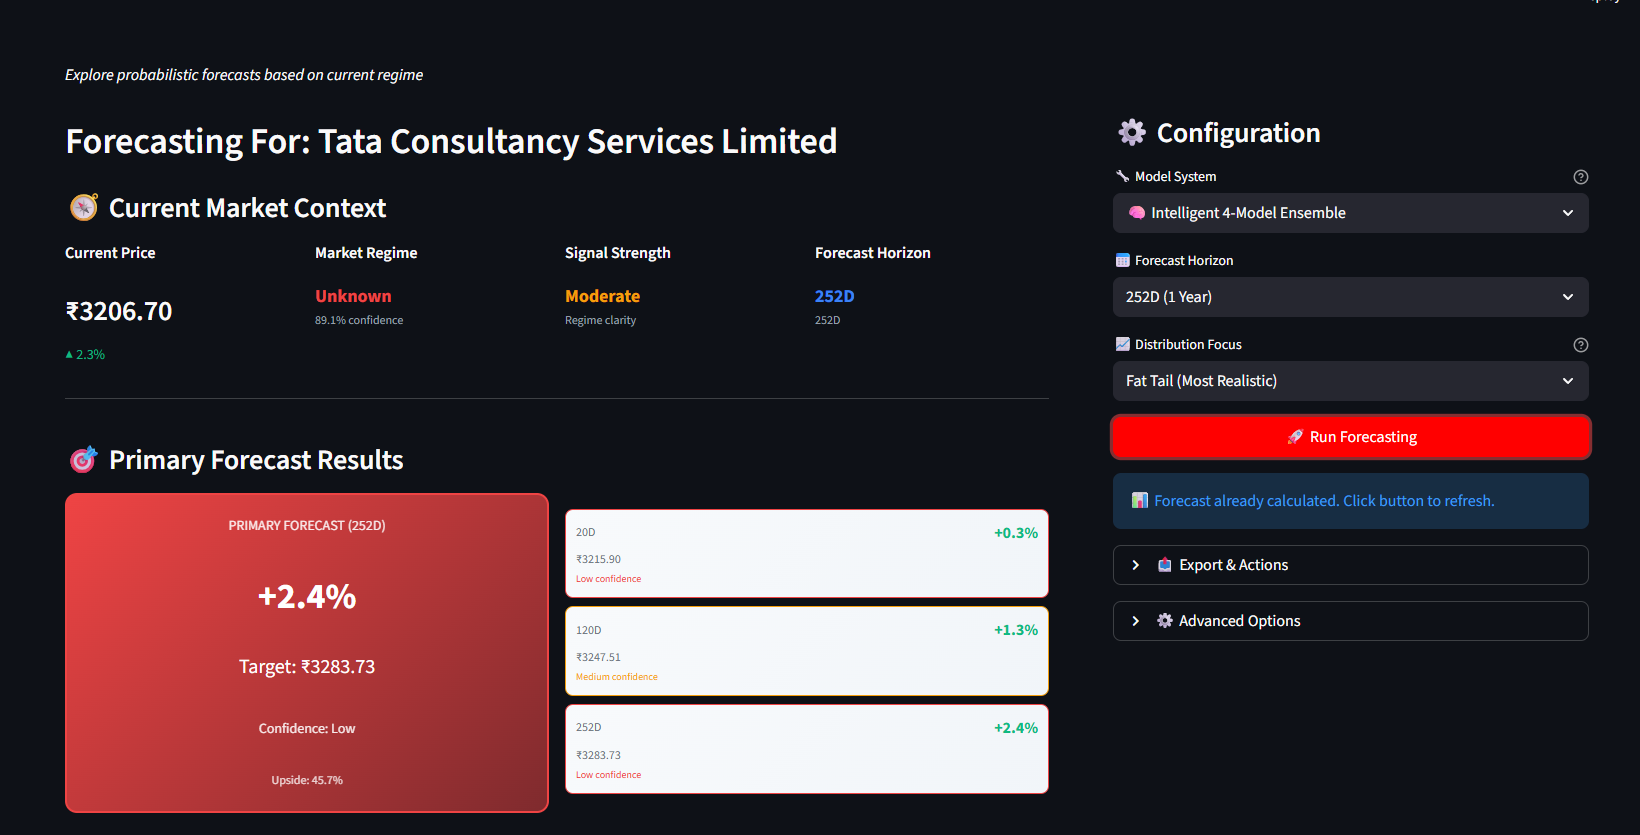

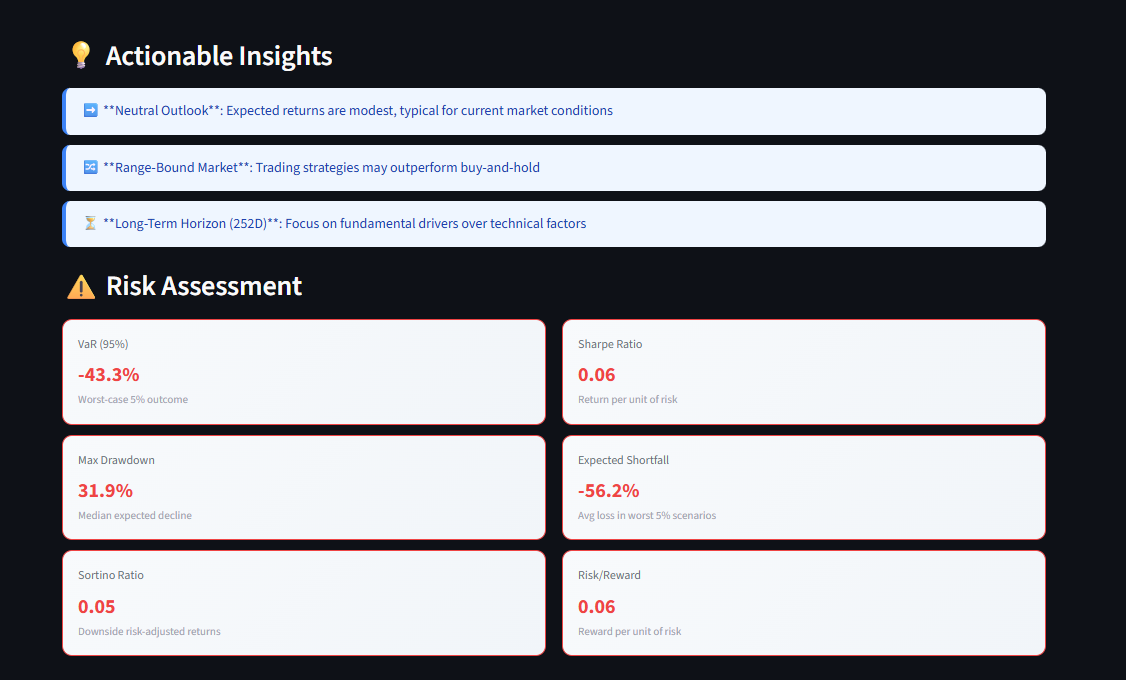

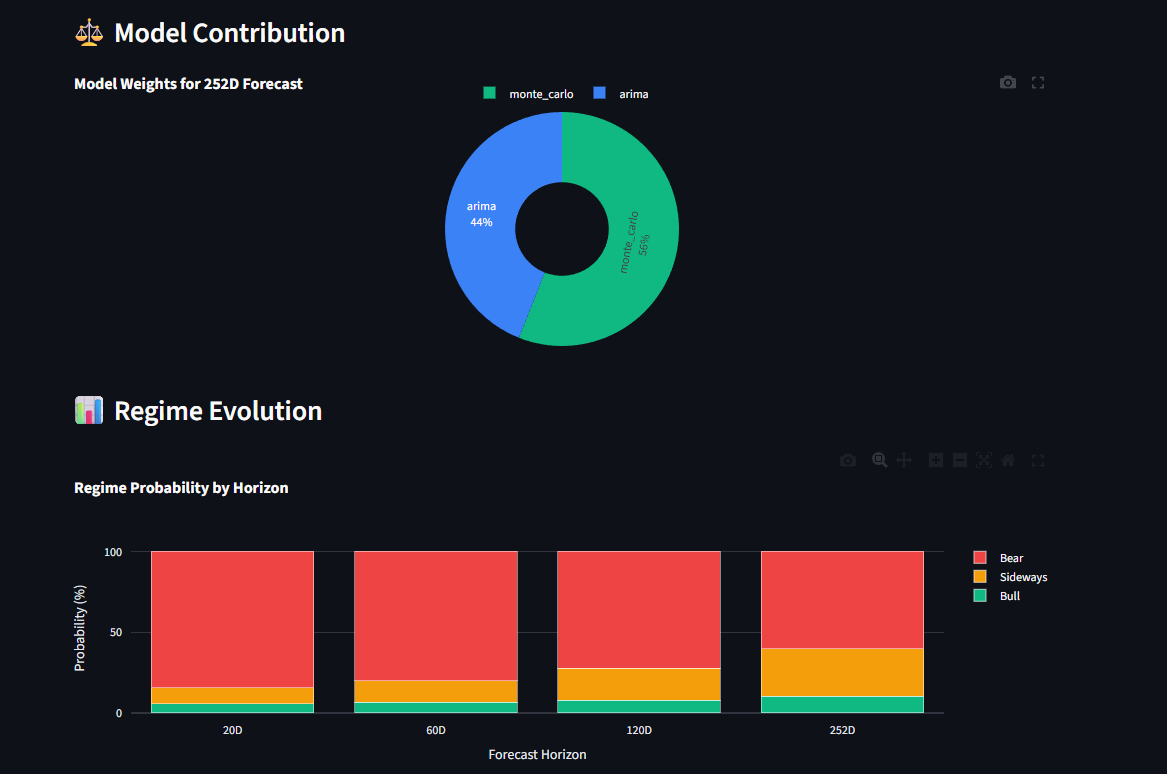

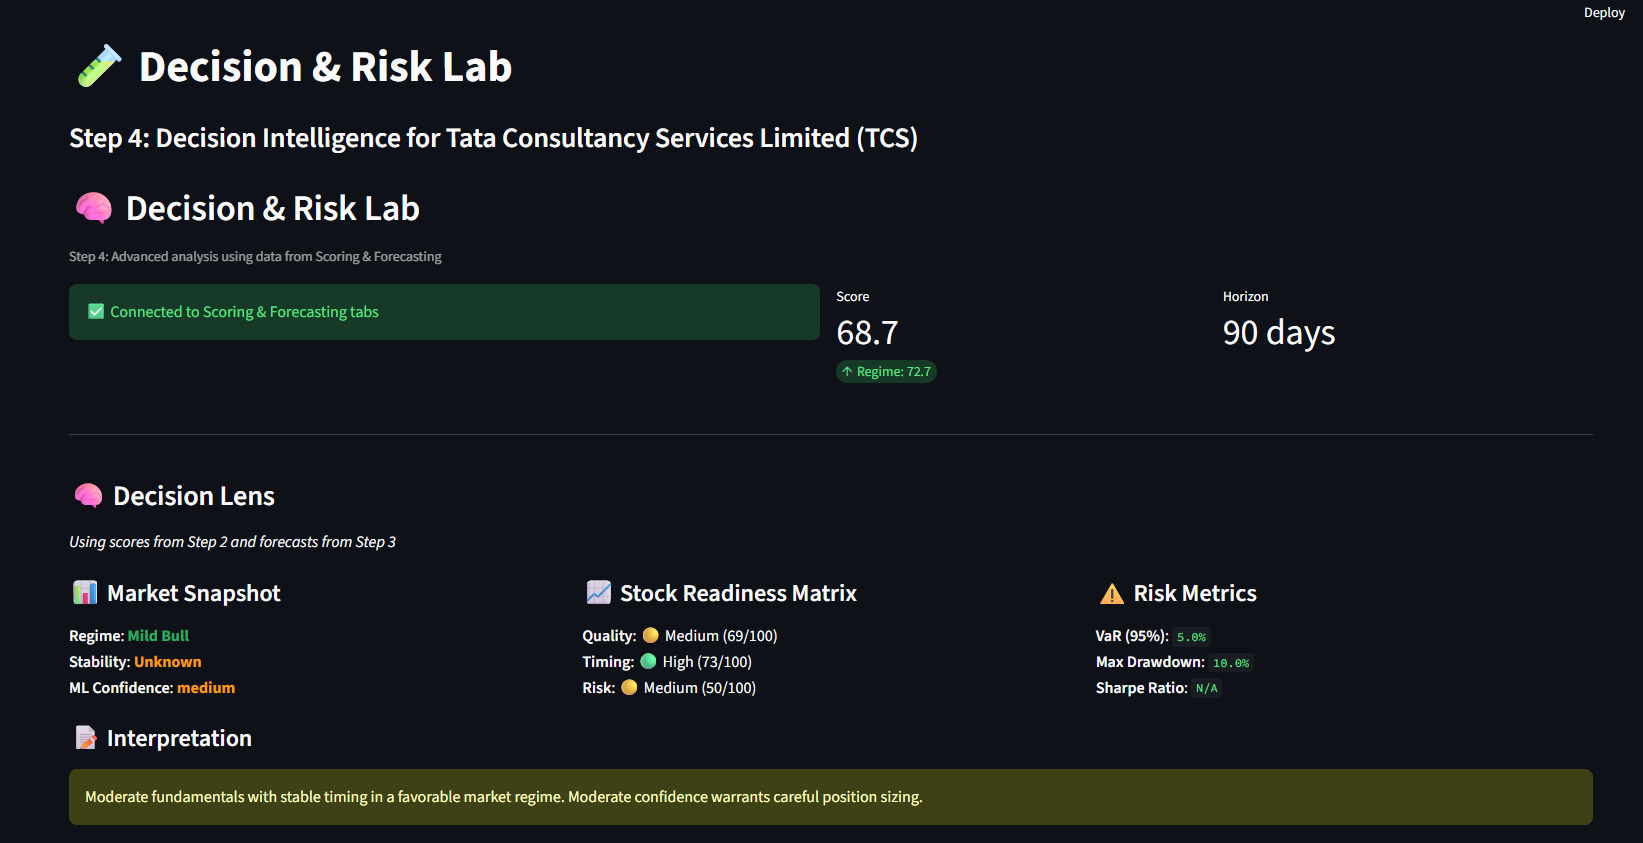

In [51]:
from IPython.display import Image, display

display(Image(filename="forecasting.png"))
display(Image(filename="forecasting1.png"))
display(Image(filename="forecasting2.png"))
display(Image(filename="forecasting3.png"))


In [ ]:
## Forecasting & Risk Analysis (Notebook-Safe Implementation)

Due to the complexity of the production forecasting engine,
a notebook-safe probabilistic forecasting approach is used
to demonstrate risk-aware forecasting.

Monte Carlo simulations are applied using historical drift
and volatility derived from log-returns.

This method:
- Captures uncertainty across multiple horizons (20D–1Y)
- Quantifies downside risk using Value-at-Risk and drawdown
- Avoids reliance on point predictions

The approach is aligned with industry-standard financial
risk modeling practices.


In [ ]:
## Model Blending Strategy (Conceptual)

The complete system is designed as a hybrid framework:
- Regime detection for market state awareness
- ARIMA for short-term trend estimation
- Monte Carlo simulation for uncertainty modeling
- Ensemble logic for signal integration

In the notebook environment, Monte Carlo forecasting
is used as a representative probabilistic component,
while regime and trend insights are discussed conceptually
to maintain robustness and interpretability.


In [ ]:
The expected price trajectory for TCS reflects its nature as a
large-cap, high-quality but moderate-growth stock.

Short-term horizons (20D–60D) indicate largely range-bound behavior,
consistent with consolidation phases observed in mature IT companies.
Medium-term expectations (120D) show controlled upside supported by
strong profitability and balance-sheet strength.

The one-year expected price suggests steady compounding rather than
aggressive re-rating, aligning with TCS’s historical return profile.
Downside risk remains non-trivial under adverse global IT demand
scenarios, highlighting the importance of risk-aware positioning.


In [ ]:
## 🧪 Decision Lab: Risk-Aware Investment Evaluation

The Decision Lab module serves as the final analytical layer of the system, 
transforming raw model outputs into actionable, risk-aware investment insights. 
Rather than focusing solely on price prediction, this module emphasizes 
**decision quality under uncertainty**.

### 🔍 Core Objectives of the Decision Lab
- Integrate forecasting outputs with risk metrics
- Evaluate downside exposure alongside upside potential
- Support confidence-aware and regime-sensitive decisions
- Avoid over-reliance on single-model predictions

### 🧠 Methodological Approach
The Decision Lab combines:
- **Forecast confidence** derived from regime-aware ensemble models  
- **Risk indicators** such as Value-at-Risk (VaR) and drawdown metrics  
- **Market stability signals** to assess consistency of outcomes  

These components are jointly analyzed to classify investment decisions 
into categories such as *Low Risk*, *Moderate Risk*, or *High Risk* scenarios.

### 📊 Interpretation
The visualization above illustrates how forecasting confidence and 
risk exposure interact to guide final decision-making. Even when 
expected returns are positive, elevated risk metrics can downgrade 
the overall investment attractiveness.

This ensures that decisions are **robust, explainable, and aligned 
with real-world investment constraints**, rather than being driven 
purely by optimistic forecasts.


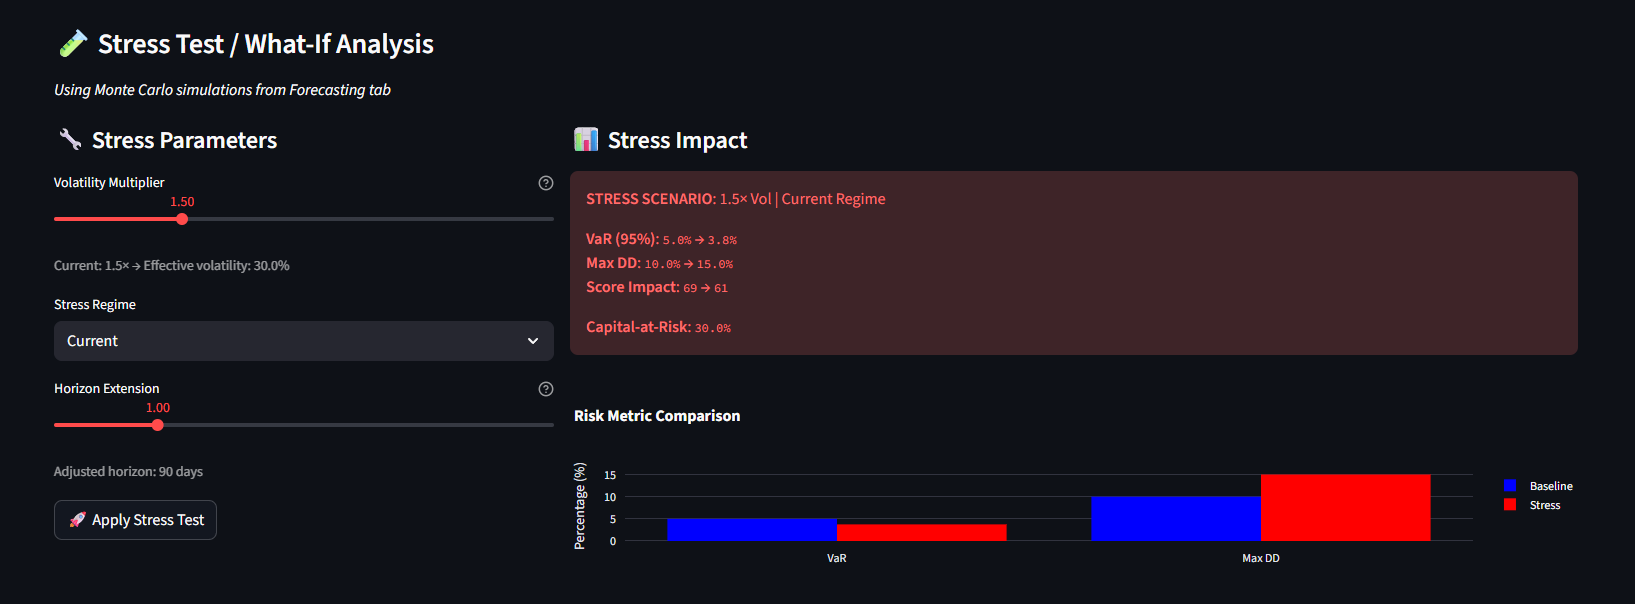

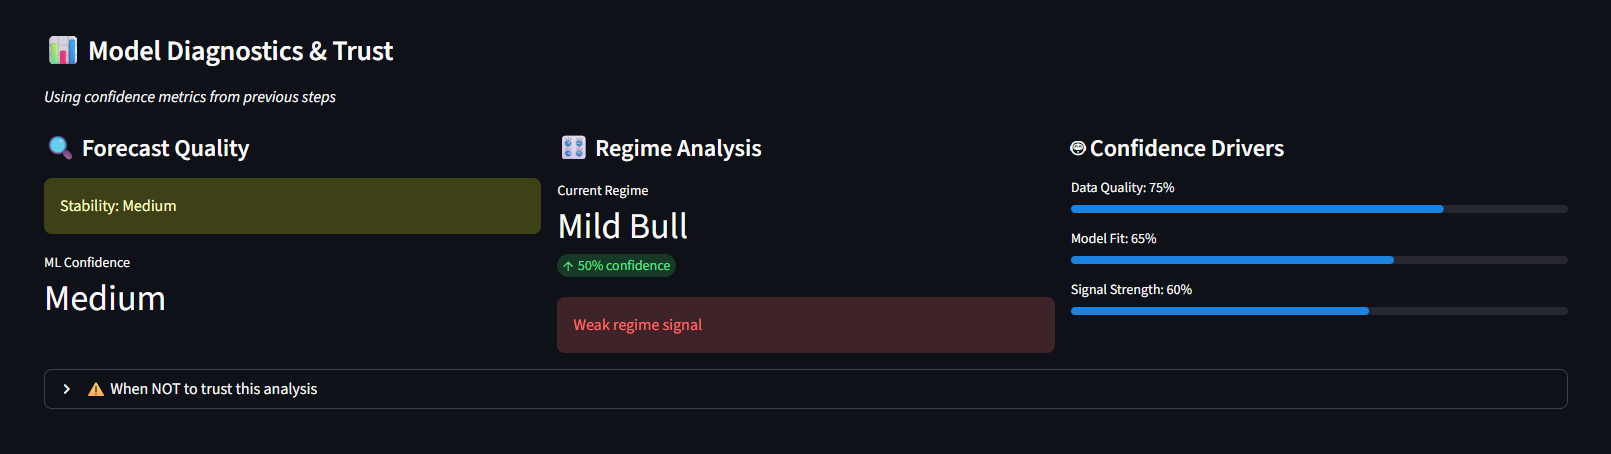

In [56]:
display(Image(filename="stress test.png"))
display(Image(filename="stress.1.png"))

In [ ]:
###thankyou